In [ ]:
import pandas as pd


# Data Observation


In [ ]:

df = pd.read_excel('/content/RetailPulseAssignmentData (1).xlsx')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1044843,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1044844,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1044845,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1044846,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1044847,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [ ]:
df.shape

(1044848, 8)

In [ ]:
df.describe()

,Quantity,Price,Customer ID
count,1.044848e+06,1.044848e+06,809561.000000
mean,9.993649e+00,4.590546e+00,15319.760422
std,1.742185e+02,1.217042e+02,1695.812057
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13969.000000
50%,3.000000e+00,2.100000e+00,15248.000000
75%,1.000000e+01,4.130000e+00,16792.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [ ]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [ ]:
df.nunique()

Invoice        53628
StockCode       5305
Description     5698
Quantity        1057
InvoiceDate    47635
Price           2807
Customer ID     5942
Country           43
dtype: int64

In [ ]:
df['Invoice'].nunique()

53628

In [ ]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4275
Quantity            0
InvoiceDate         0
Price               0
Customer ID    235287
Country             0
dtype: int64

# Data Cleaning


In [ ]:
df.dropna(inplace=True)
df=df[df['Quantity']>=0]
df=df.drop_duplicates()

In [ ]:
df['Date']=pd.to_datetime(df['InvoiceDate']).dt.date

In [ ]:
df['Time']=pd.to_datetime(df['InvoiceDate']).dt.time
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date,Time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01,07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01,07:45:00


In [ ]:
df.describe()

,Quantity,Price,Customer ID
count,779495.000000,779495.000000,779495.000000
mean,13.507085,3.218199,15320.262918
std,146.540284,29.674823,1695.722988
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13971.000000
50%,6.000000,1.950000,15246.000000
75%,12.000000,3.750000,16794.000000
max,80995.000000,10953.500000,18287.000000


In [ ]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
Date           0
Time           0
dtype: int64

In [ ]:
df.nunique()

Invoice        36975
StockCode       4631
Description     5283
Quantity         438
InvoiceDate    34591
Price            666
Customer ID     5881
Country           41
Date             604
Time             775
dtype: int64

# Searching for Loyal Customer

In [ ]:
df.groupby('Customer ID').nunique().sort_values('Invoice',ascending=False)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country,Date,Time
Customer ID,,,,,,,,,
14911.0,398,2550,2746,46,398,135,1,255,280
12748.0,337,2287,2377,65,338,121,1,203,242
17841.0,211,2116,2269,48,211,81,1,193,164
15311.0,208,864,947,58,208,81,1,196,154
13089.0,203,857,931,35,198,74,1,132,165
...,...,...,...,...,...,...,...,...,...
13111.0,1,12,12,7,1,7,1,1,1
15968.0,1,70,69,9,1,20,1,1,1
15975.0,1,24,24,7,1,12,1,1,1


In [ ]:
df.groupby('InvoiceDate').nunique()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Date,Time
InvoiceDate,,,,,,,,,
2009-12-01 07:45:00,1,8,8,4,6,1,1,1,1
2009-12-01 07:46:00,1,4,4,2,3,1,1,1,1
2009-12-01 09:06:00,1,19,19,10,14,1,1,1,1
2009-12-01 09:08:00,1,23,23,6,12,1,1,1,1
2009-12-01 09:24:00,1,17,17,5,12,1,1,1,1
...,...,...,...,...,...,...,...,...,...
2011-12-09 12:23:00,1,2,2,2,2,1,1,1,1
2011-12-09 12:25:00,1,2,2,2,2,1,1,1,1
2011-12-09 12:31:00,1,21,21,8,12,1,1,1,1


In [ ]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date,Time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01,07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01,07:45:00
...,...,...,...,...,...,...,...,...,...,...
1044843,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09,12:50:00
1044844,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,12:50:00
1044845,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,12:50:00
1044846,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-09,12:50:00


In [ ]:
df.groupby('Customer ID').nunique().sort_values(['Date','Invoice'],ascending=False)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country,Date,Time
Customer ID,,,,,,,,,
14911.0,398,2550,2746,46,398,135,1,255,280
12748.0,337,2287,2377,65,338,121,1,203,242
15311.0,208,864,947,58,208,81,1,196,154
17841.0,211,2116,2269,48,211,81,1,193,164
14606.0,192,1262,1381,39,194,71,1,181,153
...,...,...,...,...,...,...,...,...,...
18269.0,1,7,7,3,1,5,1,1,1
18274.0,1,11,11,6,1,8,1,1,1
18279.0,1,13,13,6,1,4,1,1,1


In [ ]:
df['Month']=pd.to_datetime(df['Date']).dt.month
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date,Time,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,07:45:00,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,07:45:00,12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,07:45:00,12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01,07:45:00,12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01,07:45:00,12


# Data Visualisations

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

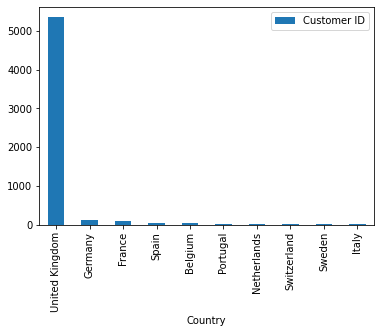

In [ ]:
filtered_df = df[['Country','Customer ID']].drop_duplicates()
filtered_df.groupby('Country').nunique().sort_values('Customer ID',ascending=False)[:10].plot(kind='bar')


In [ ]:
Monthgrp=df.groupby('Month').nunique()
Dategrp=df.groupby('Date').nunique()
Dategrp.sort_values('Month',ascending=False)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Time,Month
Date,,,,,,,,,,
2009-12-01,98,1042,1043,51,90,77,91,8,90,1
2011-04-05,46,607,607,38,43,55,45,7,43,1
2011-04-07,61,736,734,33,57,60,57,7,57,1
2011-04-08,65,636,636,32,61,59,63,5,61,1
2011-04-10,32,635,635,26,32,59,31,2,32,1
...,...,...,...,...,...,...,...,...,...,...
2010-08-08,43,562,562,36,40,48,41,2,40,1
2010-08-09,49,611,609,75,47,70,41,5,47,1
2010-08-10,39,578,578,40,37,51,33,3,37,1


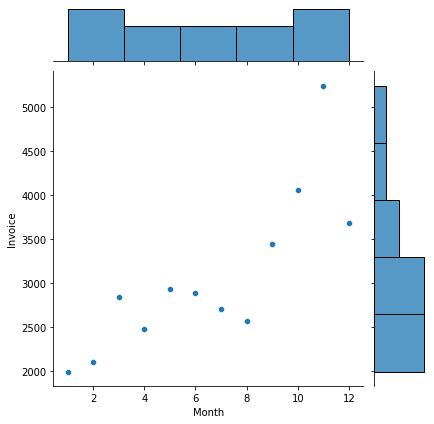

In [ ]:
sns.jointplot(x='Month',y='Invoice',data = Monthgrp)

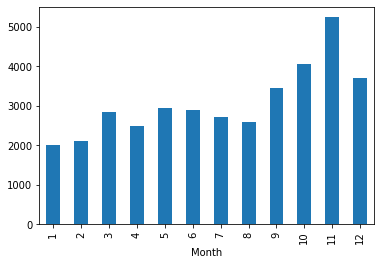

In [ ]:
Monthgrp['Invoice'].plot.bar()


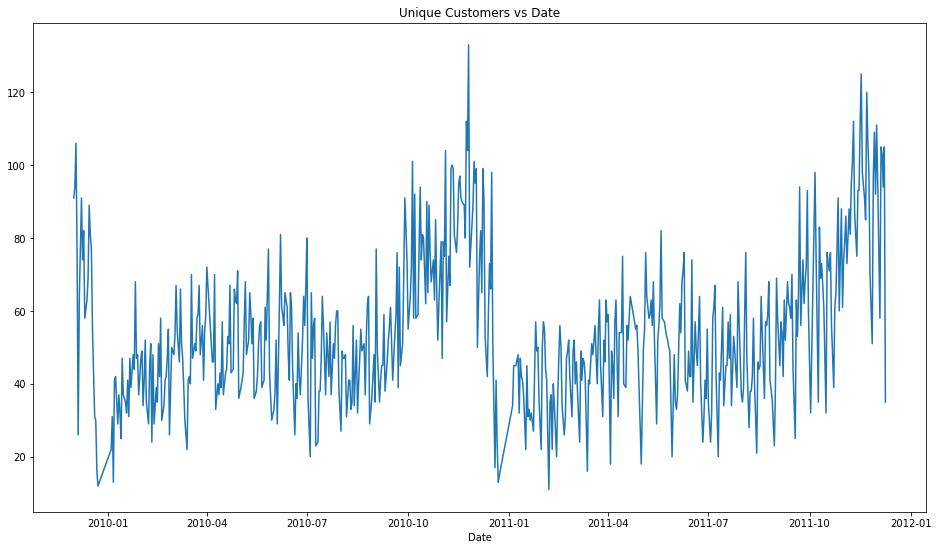

In [ ]:
df.groupby('Date').nunique()['Customer ID'].plot(title='Unique Customers vs Date', figsize=(16, 9))

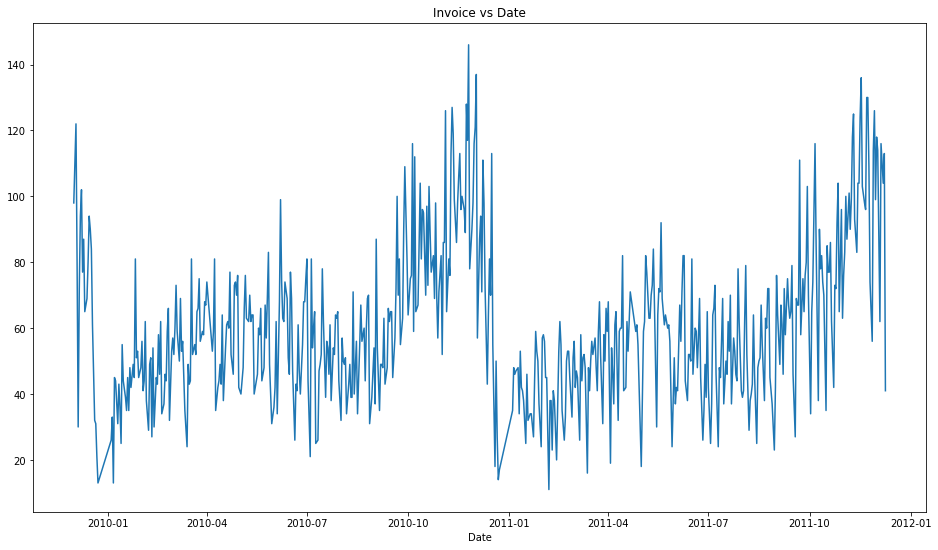

In [ ]:
df.groupby('Date').nunique()['Invoice'].plot(title='Invoice vs Date', figsize=(16, 9))

In [ ]:
df['Amount Paid']=df['Quantity']*df['Price']


In [ ]:
df.groupby('Customer ID')['Amount Paid'].sum()


Customer ID
12346.0    77556.46
12347.0     4921.53
12348.0     2019.40
12349.0     4428.69
12350.0      334.40
             ...   
18283.0     2664.90
18284.0      461.68
18285.0      427.00
18286.0     1296.43
18287.0     4182.99
Name: Amount Paid, Length: 5881, dtype: float64

In [ ]:
df_CLV=pd.DataFrame(df.groupby('Customer ID')['Amount Paid'].sum())
df_CLV.rename(columns = {'Amount paid':'CLV'}, inplace = True)
df_CLV.describe()


,Amount Paid
count,5881.000000
mean,2954.396237
std,14437.322635
min,0.000000
25%,341.900000
50%,865.600000
75%,2247.720000
max,580987.040000


In [ ]:
df_CLV['Amount Paid'].quantile(0.6)

1220.77

In [ ]:
df_CLV['Amount Paid'].quantile(0.8)

2909.86

In [ ]:
df_CLV['Amount Paid'].quantile(0.9)

5464.85

In [ ]:
df_CLV['Amount Paid'].quantile(0.95)

9371.71

In [ ]:
df_CLV['Amount Paid'].quantile(0.96)

11079.954000000016

In [ ]:
df_CLV['Amount Paid'].quantile(0.99)

29181.399999999852

mu = 2954.40 and sigma = 14436.10


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(2.0, 18000.0)

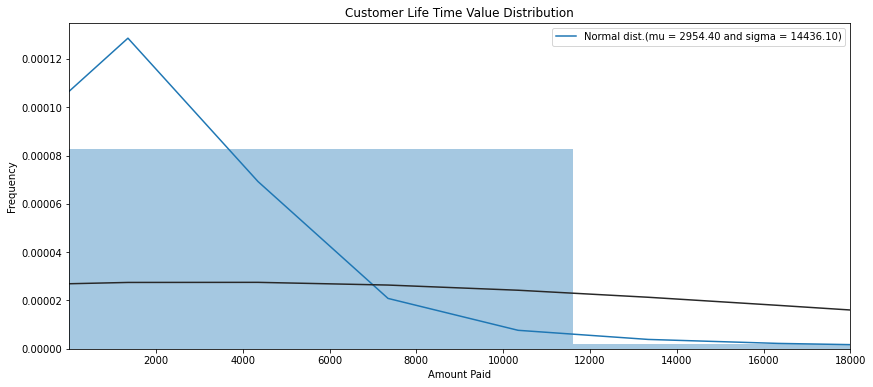

In [ ]:
mu = 2954.4
sigma = 14437.3
from scipy import stats
from scipy.stats import norm,skew

fig, ax = plt.subplots(figsize=(14, 6))
sns.distplot(df_CLV['Amount Paid'],fit=norm,ax=ax)

(mu,sigma) = norm.fit(df_CLV['Amount Paid'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu,sigma))

plt.legend(['Normal dist.(mu = {:.2f} and sigma = {:.2f})'.format(mu,sigma)],loc = 'best')
plt.ylabel('Frequency')
plt.title('Customer Life Time Value Distribution')
ax.set_xlim(2, 18000)

In [ ]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date,Time,Month,Amount Paid
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,07:45:00,12,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,07:45:00,12,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,07:45:00,12,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01,07:45:00,12,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01,07:45:00,12,30.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1044843,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09,12:50:00,12,12.60
1044844,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,12:50:00,12,16.60
1044845,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,12:50:00,12,16.60
1044846,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-09,12:50:00,12,14.85


In [ ]:
df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     105185
WHITE HANGING HEART T-LIGHT HOLDER     91757
PAPER CRAFT , LITTLE BIRDIE            80995
ASSORTED COLOUR BIRD ORNAMENT          78234
MEDIUM CERAMIC TOP STORAGE JAR         77916
                                       ...  
PINK STRIPES SHOULDER BAG                  1
SILVER AND BLACK ORBIT NECKLACE            1
BLACK DIAMOND CLUSTER EARRINGS             1
SET/2 SPOTTY + ROSE TEA TOWELS             1
SET 12 COLOURING PENCILS DOILEY            1
Name: Quantity, Length: 5283, dtype: int64

In [ ]:
mod_df = df.groupby(['Country','Description']).head(5)
mod_df
# pd.DataFrame(mod_df)['Quantity'].sum().sort_values(ascending=False))

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date,Time,Month,Amount Paid
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,07:45:00,12,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,07:45:00,12,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,07:45:00,12,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01,07:45:00,12,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01,07:45:00,12,30.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1044728,581578,23550,WRAP ALPHABET POSTER,25,2011-12-09 12:16:00,0.42,12713.0,Germany,2011-12-09,12:16:00,12,10.50
1044735,581578,23515,EMBROIDERED RIBBON REEL DAISY,6,2011-12-09 12:16:00,2.08,12713.0,Germany,2011-12-09,12:16:00,12,12.48
1044736,581578,22081,RIBBON REEL FLORA + FAUNA,10,2011-12-09 12:16:00,1.65,12713.0,Germany,2011-12-09,12:16:00,12,16.50
1044742,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany,2011-12-09,12:16:00,12,24.96
